# Labonne - Hands-On Graph Neural Networks Using Python

## Chapter 2 - Graph theory for GNNs

Basic graph theory stuff: directed, weighted, connected etc.

For my purposes, chapter is mainly for looking at use of `networkx` library here.

- searched online: use `nx.draw(GRAPH_NAME, with_labels=True)` to get labels easily (look into customisation later)
- seems that there are better dedicated graph drawing libraries



In [2]:
import networkx as nx

In [3]:
# undirected graph with networkx
G = nx.Graph()

G.add_edges_from([
    ('A','B'),('A','C'),
    ('B','D'),('B','E'),
    ('C','F'),('C','G'),('C','H'),
])

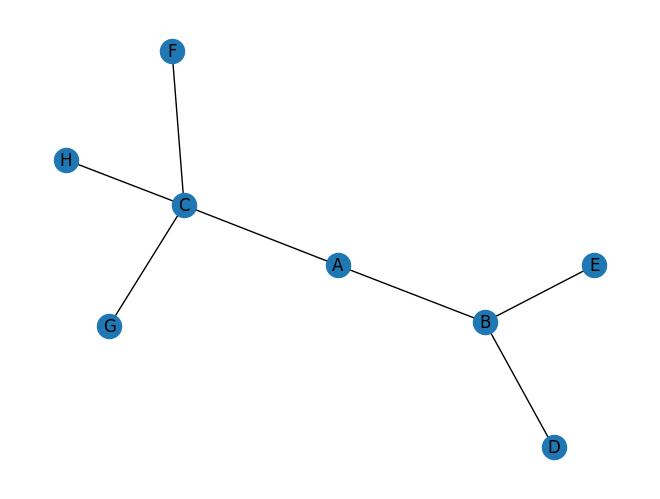

In [5]:
# how to show graphs - use draw
nx.draw(G, with_labels=True)

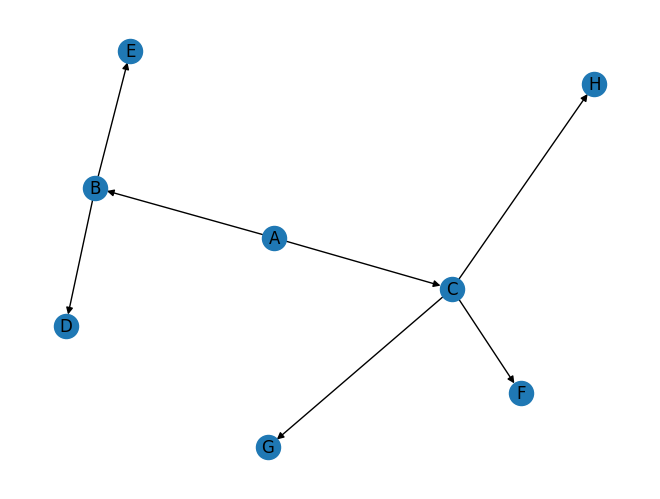

In [7]:
# directed graph
DG = nx.DiGraph()


DG.add_edges_from([
    ('A','B'),('A','C'),
    ('B','D'),('B','E'),
    ('C','F'),('C','G'),('C','H'),
])

nx.draw(DG, with_labels=True)

In [10]:
# weighted graph
WG = nx.Graph()

WG.add_edges_from([
    ('A', 'B', {"weight": 10}),
    ('A', 'C', {"weight": 20}),
    ('B', 'D', {"weight": 30}),
    ('B', 'E', {"weight": 40}),
    ('C', 'F', {"weight": 50}),
    ('C', 'G', {"weight": 60})
])

labels = nx.get_edge_attributes(WG, "weight")

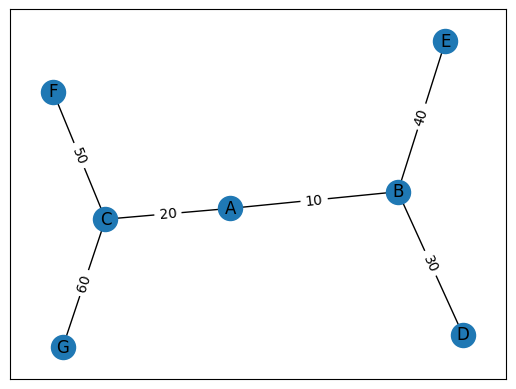

In [12]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(WG) # pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(WG, pos)
labels = nx.get_edge_attributes(WG,'weight')
nx.draw_networkx_edge_labels(WG, pos, edge_labels=labels)
plt.show()

### Graph connectivity

Is graph 1 connected? False


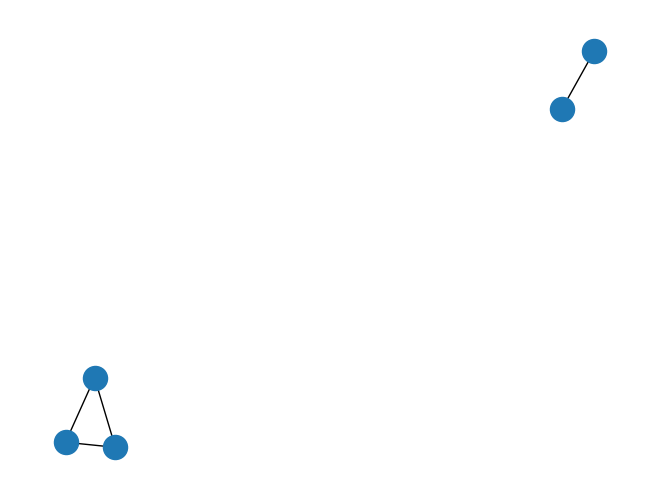

In [14]:
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (2, 3), (3, 1), (4, 5)])
print(f"Is graph 1 connected? {nx.is_connected(G1)}")
nx.draw(G1)


Is graph 2 connected? True


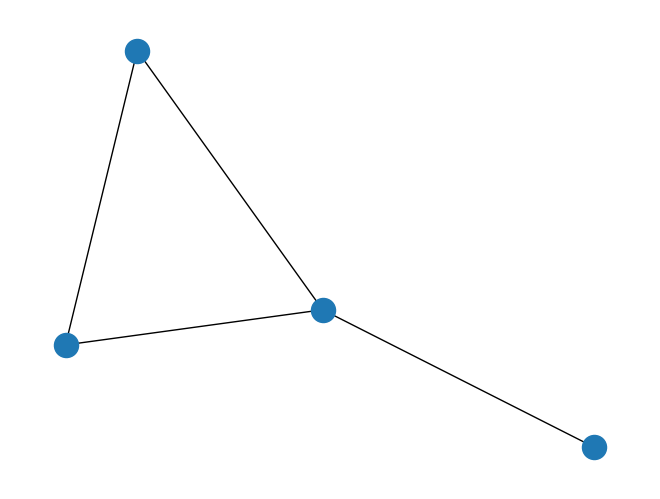

In [15]:
G2 = nx.Graph()
G2.add_edges_from([(1, 2), (2, 3), (3, 1), (1, 4)])
print(f"Is graph 2 connected? {nx.is_connected(G2)}")
nx.draw(G2)

### Graph properties

OK for the theory stuff - lots of basic functions in the library for checking e.g. degree of nodes etc.

deg(A) = 2


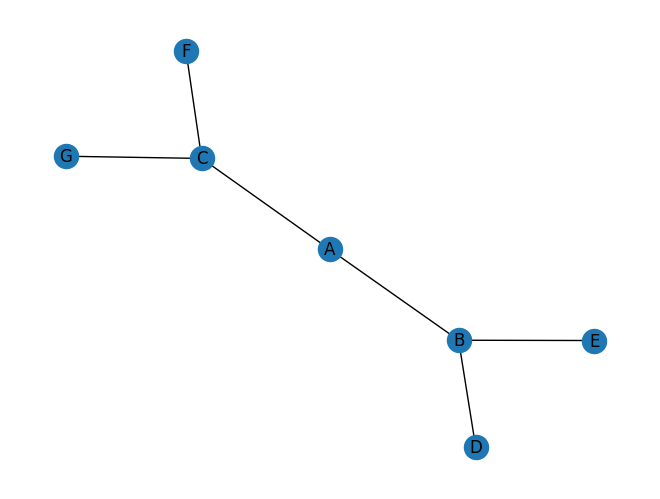

In [18]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])

print(f"deg(A) = {G.degree['A']}")
nx.draw(G, with_labels=True)

deg^-(A) = 0
deg^+(A) = 2


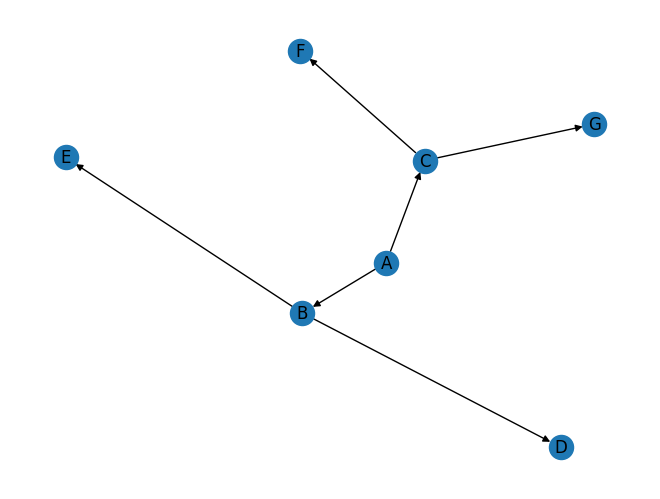

In [19]:
DG = nx.DiGraph()
DG.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B',
'E'), ('C', 'F'), ('C', 'G')])
print(f"deg^-(A) = {DG.in_degree['A']}")
print(f"deg^+(A) = {DG.out_degree['A']}")
nx.draw(DG, with_labels=True)

### Graph measures

- degree centrality : this is just the degree of the node
- closeness centrality : for a given node, the average length of the shortest paths to all other nodes in the graph
- betweenness centrality : for a given node, how many times does it lie on the shortest path between pairs of other nodes in the graph (high B.C. means a node that is a kind of bottleneck or bridge between parts of the graph)

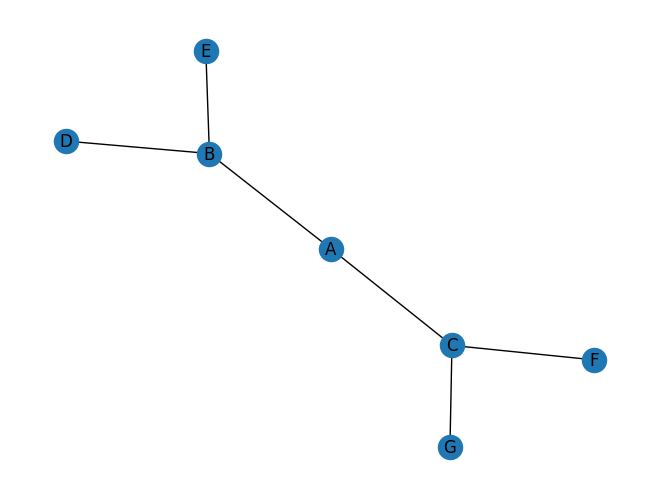

In [20]:
# resuse graph from before
nx.draw(G, with_labels=True)

In [21]:
print(f"Degree centrality = {nx.degree_centrality(G)}")
print(f"Closeness centrality = {nx.closeness_centrality(G)}")
print(f"Betweenness centrality = {nx.betweenness_centrality(G)}")

Degree centrality = {'A': 0.3333333333333333, 'B': 0.5, 'C': 0.5, 'D': 0.16666666666666666, 'E': 0.16666666666666666, 'F': 0.16666666666666666, 'G': 0.16666666666666666}
Closeness centrality = {'A': 0.6, 'B': 0.5454545454545454, 'C': 0.5454545454545454, 'D': 0.375, 'E': 0.375, 'F': 0.375, 'G': 0.375}
Betweenness centrality = {'A': 0.6, 'B': 0.6, 'C': 0.6, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0}


### Representations

- Adjacency matrix 
- Edge list
- Adjacency list


### Graph algorithms

- BFS and DFS

Example implementations using networkx



In [22]:
# -- BFS --
G = nx.Graph()

G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])

In [23]:
# FOR BELOW bfs CODE : so you can see what gets displayed when you access e.g. node 'A' of G
# you see its neighbours as keys of a dict
print(G['A'])

{'B': {}, 'C': {}}


In [24]:
def bfs(graph, node):
    visited = [node]
    queue = [node]
    
    while queue:
        curr_node = queue.pop(0)
        for neighbour in graph[curr_node]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)
    
    return visited

In [25]:
bfs(G, 'A') # pretty strange pedagogy to have the BFS answer be exactly sorted ABCDEFG

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [26]:
# -- DFS --
visited = []

def dfs(visited, graph, node):
    if node not in visited:
        visited.append(node)
        for neighbour in graph[node]:
            visited = dfs(visited, graph, neighbour)
    return visited

In [27]:
dfs(visited, G, 'A')

['A', 'B', 'D', 'E', 'C', 'F', 'G']